In [24]:
import numpy as np
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm_notebook
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import bernoulli

In [3]:
history_length = 30
forecast_range = 1

In [8]:
with open('./public_bouy_target.pkl', 'rb') as f:
    targets = pickle.load(f)
true_targets = np.concatenate(targets)
true_targets.shape

(234482,)

In [4]:
with open('./x_AR_vectorized.pkl', 'rb') as f:
    x_AR_vectorized = pickle.load(f)

In [5]:
with open('./y_AR_vectorized.pkl', 'rb') as f:
    y_AR_vectorized = pickle.load(f)

## Random baseline model

In [9]:
pred_targets = []
for xAR in tqdm_notebook(x_AR_vectorized):
    pred_target = bernoulli.rvs(0.5, size=xAR.shape[0])
    pred_target = np.concatenate([np.zeros(history_length, dtype=bool), pred_target])
    pred_targets.append(pred_target)

/tmp/ipykernel_24364/1404213454.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for xAR in tqdm_notebook(x_AR_vectorized):


  0%|          | 0/40 [00:00<?, ?it/s]

In [10]:
pred_targets = np.concatenate(pred_targets)
pred_targets.shape

(234482,)

In [11]:
f1_score(true_targets, pred_targets)

0.03817305227293402

## Bernoulli baseline models

In [18]:
def f1_random_model(p=0.5):
    pred_targets = []
    for xAR in x_AR_vectorized:
        pred_target = bernoulli.rvs(p, size=xAR.shape[0])
        pred_target = np.concatenate([np.zeros(history_length, dtype=bool), pred_target])
        pred_targets.append(pred_target)
    pred_targets = np.concatenate(pred_targets)
    return f1_score(true_targets, pred_targets)

In [22]:
scores = []
for p in np.linspace(0.01, 0.99, 99):
    scores.append(f1_random_model(p))

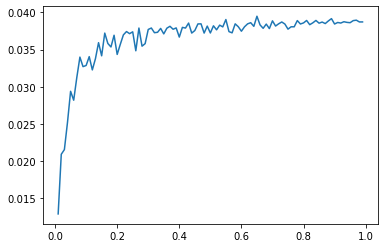

In [25]:
plt.plot(np.linspace(0.01, 0.99, 99), scores);

## Constant (positive) baseline model

In [12]:
pred_targets = []
for xAR in tqdm_notebook(x_AR_vectorized):
    pred_target = np.ones((xAR.shape[0]), dtype=bool)
    pred_target = np.concatenate([np.zeros(history_length, dtype=bool), pred_target])
    pred_targets.append(pred_target)

/tmp/ipykernel_24364/1585500004.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for xAR in tqdm_notebook(x_AR_vectorized):


  0%|          | 0/40 [00:00<?, ?it/s]

In [13]:
pred_targets = np.concatenate(pred_targets)
pred_targets.shape

(234482,)

In [14]:
f1_score(true_targets, pred_targets)

0.038787776890420754

## Constant (negative) baseline model

In [15]:
pred_targets = []
for xAR in tqdm_notebook(x_AR_vectorized):
    pred_target = np.zeros((xAR.shape[0]), dtype=bool)
    pred_target = np.concatenate([np.zeros(history_length, dtype=bool), pred_target])
    pred_targets.append(pred_target)

/tmp/ipykernel_24364/306876299.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for xAR in tqdm_notebook(x_AR_vectorized):


  0%|          | 0/40 [00:00<?, ?it/s]

In [16]:
pred_targets = np.concatenate(pred_targets)
pred_targets.shape

(234482,)

In [17]:
f1_score(true_targets, pred_targets)

0.0